In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import zipfile
import os
import re
from collections import Counter
from bs4 import BeautifulSoup

In [192]:
data = pd.read_csv("combined_data.csv")
data.drop(columns=["zarobki", "Unnamed: 0"])

,zarobki_min,zarobki_max,nazwa,miasto,zdalnie
0,Brak danych,Brak danych,Junior PHP/JS Developer - Tech Support,Warszawa,Nie
1,Brak danych,Brak danych,Płatny staż programistyczny,Kraków,Nie
2,Brak danych,Brak danych,"Support Team Leader (Incident, Problem, Change...",Kraków,Nie
3,Brak danych,Brak danych,Java Developer,Warszawa,Nie
4,20000,28000,Senior Node.js Developer,Nie podano,Tak
...,...,...,...,...,...
10607,Brak danych,Brak danych,Full Stack Machine Learning Developer,Warszawa,Nie
10608,10 000,18 000,Python Django Developer,Poznań,Tak
10609,10 000,20 000,AI Engineer,Warszawa,Tak
10610,18 000,20 500,Python Developer with SQL,Warszawa,Nie


In [193]:
data.drop(data[data.zarobki_min == "Brak danych"].index, inplace=True)
data


,zarobki_min,zarobki_max,nazwa,miasto,zdalnie,Unnamed: 0,zarobki
4,20000,28000,Senior Node.js Developer,Nie podano,Tak,NaN,NaN
9,7000,10000,Programista APS.net / MS VBA,Warszawa,Tak,NaN,NaN
10,10000,14000,Test Automation Engineer II - Signing bonus El...,Nie podano,Tak,NaN,NaN
15,10000,14000,Java Software Engineer II - Signing Bonus Elig...,Nie podano,Tak,NaN,NaN
18,10460,20160,Ruby Developer,Nie podano,Tak,NaN,NaN
...,...,...,...,...,...,...,...
10606,16 000,28 000,Data Scientist,Wrocław,Nie,NaN,NaN
10608,10 000,18 000,Python Django Developer,Poznań,Tak,NaN,NaN
10609,10 000,20 000,AI Engineer,Warszawa,Tak,NaN,NaN
10610,18 000,20 500,Python Developer with SQL,Warszawa,Nie,NaN,NaN


In [194]:
def read_shape_from_zip(zip_filename, entry_name_regex):
    z = zipfile.ZipFile(zip_filename, mode="r")
    dbf_name = list(filter(
        lambda x: re.match(entry_name_regex + r'.*\.dbf$',
                           os.path.basename(x)),
        z.namelist()
    ))[0]
    z.close()
    return geopandas.read_file(dbf_name, encoding='utf-8', vfs='zip://'+zip_filename)

In [195]:
lista_miast = []
for miasta in data.miasto.to_list():
    if ("+" in miasta):
        lista_miast.append(miasta.split("+")[0].split(",")[0].strip().upper())
    elif "," in miasta:
        for miasto in miasta.split(","):
            lista_miast.append(miasto.strip().upper())
    elif (miasta == "Nie podano"):
        pass

    else:
        lista_miast.append(miasta.upper())

len(lista_miast)

7070

In [196]:
for miasto in lista_miast:
    if "SUCHY LAS" in miasto:
        lista_miast.remove(miasto)
        lista_miast.append("Poznań".upper())
    if "WARSAW" in miasto:
        lista_miast.remove(miasto)
        lista_miast.append("WARSZAWA")

In [197]:
zbior_miast = set(lista_miast)
zbior_miast

{'AMSTERDAM',
 'ANIF',
 'ATENY',
 'ATLANTA',
 'AUSTIN',
 'BARCELONA',
 'BATH',
 'BERLIN',
 'BIAŁYSTOK',
 'BIELSKO-BIAŁA',
 'BOCA RATON',
 'BOSTON',
 'BRATISLAVA',
 'BRNO',
 'BRUKSELA',
 'BUDAPEST',
 'BYDGOSZCZ',
 'CARY',
 'CHORZÓW',
 'CZĘSTOCHOWA',
 'DALLAS',
 'DENVER',
 'DUBAJ',
 'DUBLIN',
 'DĄBROWA GÓRNICZA',
 'ESCH-SUR-ALZETTE',
 'FULLY REMOTE',
 'GDAŃSK',
 'GDYNIA',
 'GENEWA',
 'GENT',
 'GLIWICE',
 'GRODZISK MAZOWIECKI',
 'GŻIRA',
 'HELSINKI',
 'HINXTON',
 'IXELLES',
 'JASIONKA',
 'JELCZ LASKOWICE',
 'KALISZ',
 'KATOWICE',
 'KEMPTEN (ALLGÄU)',
 'KIELCE',
 'KNURÓW',
 'KOMORNIKI',
 'KRAKAU',
 'KRAKOW',
 'KRAKÓW',
 'LEGNICA',
 'LEIPZIG',
 'LIMASSOL',
 'LIMERICK',
 'LISBOA',
 'LONDON',
 'LONDYN',
 'LOS ANGELES',
 'LUBLIN',
 'LUMEN',
 'MADRID',
 'MADRYT',
 'MARKI',
 'MEDIOLAN',
 'MELBOURNE',
 'MILAN',
 'MILANO',
 'MYSŁOWICE',
 'MÜNCHEN',
 'NASHVILLE',
 'NEW YORK',
 'NICOSIA',
 'NIEMCZ',
 'NIŠ',
 'OPOLE',
 'OSLO',
 'OSTRÓW WIELKOPOLSKI',
 'OTTAWA',
 'PABIANICE',
 'PARIS',
 'PARK WEST',
 

In [198]:
offers_per_city = Counter(lista_miast)
offers_per_city

Counter({'WARSZAWA': 2148,
         'GDAŃSK': 406,
         'WROCŁAW': 964,
         'KRAKÓW': 1071,
         'KATOWICE': 480,
         'ŁÓDŹ': 348,
         'OPOLE': 14,
         'KIELCE': 67,
         'KRAKOW': 41,
         'RZESZÓW': 64,
         'GDYNIA': 79,
         'BIAŁYSTOK': 132,
         'LUBLIN': 139,
         'SZTOKHOLM': 12,
         'GŻIRA': 6,
         'POZNAŃ': 390,
         'TBILISI': 6,
         'ZIELONA GÓRA': 58,
         'BYDGOSZCZ': 54,
         'CZĘSTOCHOWA': 35,
         'GLIWICE': 140,
         'BERLIN': 20,
         'KEMPTEN (ALLGÄU)': 2,
         'PARYŻ': 8,
         'ULM': 6,
         'SZCZECIN': 65,
         'BIELSKO-BIAŁA': 22,
         'PŁOCK': 3,
         'SOSNOWIEC': 1,
         'PIŁA': 5,
         'OSTRÓW WIELKOPOLSKI': 3,
         'ATENY': 2,
         'LIMASSOL': 5,
         'ANIF': 3,
         'SALZBURG': 3,
         'PABIANICE': 1,
         'PIEŃKÓW': 1,
         'ZABIERZÓW': 5,
         'SZCZAWNO-ZDRÓJ': 1,
         'STAROGARD GDAŃSKI': 1,
       

In [199]:
with open("miasta.html") as miasta:
    soup = BeautifulSoup(miasta, "html.parser")

role = soup.find_all("tr", {"role":"row"})

lista_miast = []
for i in range(1, len(role)):
    dict = {"miasto" : role[i].find_all("a")[0].text.strip().upper(), "wojewodztwo" : role[i].find_all("a")[2].text.strip().upper()}
    lista_miast.append(dict)

df_woj = pd.DataFrame(lista_miast)
df_woj['ilosc'] = 0
df_woj

,miasto,wojewodztwo,ilosc
0,KAMIENIEC ZĄBKOWICKI,DOLNOŚLĄSKIE,0
1,WLEŃ,DOLNOŚLĄSKIE,0
2,LUBOMIERZ,DOLNOŚLĄSKIE,0
3,PRUSICE,DOLNOŚLĄSKIE,0
4,WIĄZÓW,DOLNOŚLĄSKIE,0
...,...,...,...
959,ŚWINOUJŚCIE,ZACHODNIOPOMORSKIE,0
960,KOŁOBRZEG,ZACHODNIOPOMORSKIE,0
961,STARGARD,ZACHODNIOPOMORSKIE,0
962,KOSZALIN,ZACHODNIOPOMORSKIE,0


In [200]:
for miasto in offers_per_city.keys():
    df_woj.loc[df_woj['miasto'] == miasto, 'ilosc'] = offers_per_city.get(miasto)

df_woj = df_woj.drop(df_woj[df_woj.ilosc == 0].index)
df_woj

,miasto,wojewodztwo,ilosc
31,SZCZAWNO-ZDRÓJ,DOLNOŚLĄSKIE,1
49,SIECHNICE,DOLNOŚLĄSKIE,1
85,ŚWIDNICA,DOLNOŚLĄSKIE,1
89,LEGNICA,DOLNOŚLĄSKIE,1
90,WAŁBRZYCH,DOLNOŚLĄSKIE,1
91,WROCŁAW,DOLNOŚLĄSKIE,964
143,TORUŃ,KUJAWSKO-POMORSKIE,8
144,BYDGOSZCZ,KUJAWSKO-POMORSKIE,54
195,LUBLIN,LUBELSKIE,139
238,ZIELONA GÓRA,LUBUSKIE,58


In [201]:
woj_geo = read_shape_from_zip("Wojewodztwa.zip", "Województwa")

/Users/jonaszgawlik/opt/anaconda3/envs/wizualizacja_danych/lib/python3.10/site-packages/fiona/env.py:408: FionaDeprecationWarning: The vfs keyword argument is deprecated. Instead, pass a URL that uses a zip or tar (for example) scheme.
  return f(*args, **kwargs)


In [202]:
woj_geo['JPT_NAZWA_'] = woj_geo['JPT_NAZWA_'].str.upper()
woj_geo.rename(columns={"JPT_NAZWA_" : "wojewodztwo"}, inplace=True)
woj_geo

,JPT_SJR_KO,JPT_KOD_JE,wojewodztwo,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,ŚLĄSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((494179.526 358814.295, 494173...."
1,WOJ,16,OPOLSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((417001.841 369554.248, 417005.901 36..."
2,WOJ,26,ŚWIĘTOKRZYSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((549668.108 320839.847, 549676.668 32..."
3,WOJ,22,POMORSKIE,None,0,2020-04-09,None,2012-09-26,None,None,...,22,None,None,UZG,0,1358902,None,13.167595,2.520630,"POLYGON ((414159.332 769636.478, 414269.395 76..."
4,WOJ,20,PODLASKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,20,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((700075.252 572284.982, 700055.491 57..."
5,WOJ,32,ZACHODNIOPOMORSKIE,None,0,2020-04-24,None,2012-09-26,None,None,...,32,None,None,UZG,0,1358951,None,12.137158,3.107549,"POLYGON ((225874.333 694332.554, 231446.660 69..."
6,WOJ,02,DOLNOŚLĄSKIE,None,0,2018-09-25,None,2012-09-26,None,None,...,02,None,None,UZG,0,1348257,None,13.844520,2.559175,"POLYGON ((229358.510 402830.704, 229362.963 40..."
7,WOJ,30,WIELKOPOLSKIE,None,0,2020-12-08,None,2012-09-26,None,None,...,30,None,None,UZG,0,1359173,None,18.408184,3.932195,"POLYGON ((347736.460 606210.458, 347736.779 60..."
8,WOJ,18,PODKARPACKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,18,None,None,UZG,0,1331325,None,11.220452,2.235693,"POLYGON ((713790.986 331036.437, 713798.945 33..."
9,WOJ,12,MAŁOPOLSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,12,None,None,UZG,0,1331327,None,11.428657,1.898506,"POLYGON ((568911.289 294804.269, 568909.081 29..."


In [203]:
woj_amt = df_woj.drop(columns="miasto")
woj_amt = woj_amt.groupby('wojewodztwo').sum()
woj_amt

df_woj_amt = pd.merge(woj_geo, woj_amt, left_on='wojewodztwo', right_index=True)
df_woj_amt.sort_values('ilosc',ascending=False)


,JPT_SJR_KO,JPT_KOD_JE,wojewodztwo,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,ilosc
12,WOJ,14,MAZOWIECKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,None,None,UZG,0,1353684,None,20.227207,4.689476,"POLYGON ((700396.155 572145.561, 700403.968 57...",2153
9,WOJ,12,MAŁOPOLSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,None,None,UZG,0,1331327,None,11.428657,1.898506,"POLYGON ((568911.289 294804.269, 568909.081 29...",1075
6,WOJ,02,DOLNOŚLĄSKIE,None,0,2018-09-25,None,2012-09-26,None,None,...,None,None,UZG,0,1348257,None,13.844520,2.559175,"POLYGON ((229358.510 402830.704, 229362.963 40...",969
0,WOJ,24,ŚLĄSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((494179.526 358814.295, 494173....",691
3,WOJ,22,POMORSKIE,None,0,2020-04-09,None,2012-09-26,None,None,...,None,None,UZG,0,1358902,None,13.167595,2.520630,"POLYGON ((414159.332 769636.478, 414269.395 76...",502
7,WOJ,30,WIELKOPOLSKIE,None,0,2020-12-08,None,2012-09-26,None,None,...,None,None,UZG,0,1359173,None,18.408184,3.932195,"POLYGON ((347736.460 606210.458, 347736.779 60...",399
11,WOJ,10,ŁÓDZKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829367,None,12.079404,2.363616,"POLYGON ((569440.120 369049.127, 569457.747 36...",350
14,WOJ,06,LUBELSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829365,None,14.108456,3.232313,"POLYGON ((681015.792 420027.270, 681441.239 42...",139
4,WOJ,20,PODLASKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((700075.252 572284.982, 700055.491 57...",132
2,WOJ,26,ŚWIĘTOKRZYSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((549668.108 320839.847, 549676.668 32...",67


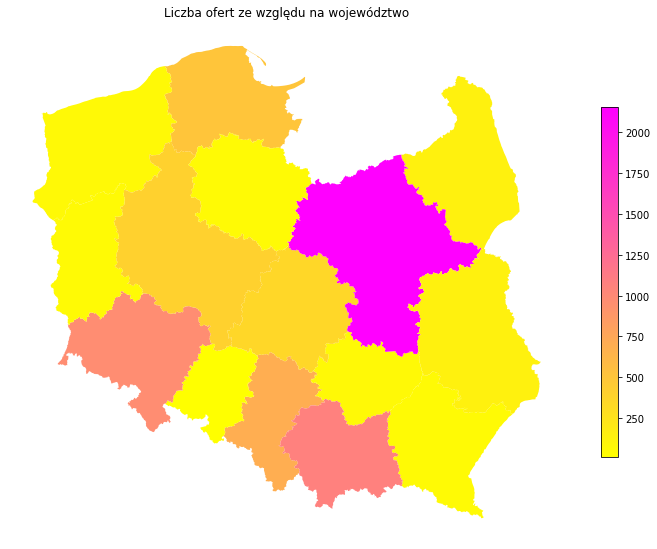

In [204]:
fig, ax = plt.subplots(figsize=(10, 10))
df_woj_amt.plot(column='ilosc', cmap='spring_r', linewidth=1.5, ax=ax)

vmin, vmax = df_woj_amt['ilosc'].min(), df_woj_amt['ilosc'].max()
sm = plt.cm.ScalarMappable(cmap='spring_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, shrink=0.5, ax=ax)

ax.grid(True)
ax.set_axis_off()
ax.set_title("Liczba ofert ze względu na województwo")
plt.tight_layout()
plt.show()

In [205]:
data2 = pd.read_csv("combined_data_with_average_salary.csv")
data2 = data2.drop(columns=["Unnamed: 0"])

In [206]:
data2

,zarobki_min,zarobki_max,nazwa,miasto,zdalnie,zarobki_srednie
0,7000.0,10000.0,Programista APS.net / MS VBA,Warszawa,Tak,8500.0
1,8000.0,28056.0,React Frontend Developer,Gdańsk,Tak,18028.0
2,8000.0,21000.0,Java/Kotlin Developer,Gdańsk,Tak,14500.0
3,9000.0,15000.0,IT Specialist – Specjalista ds. Wdrożeń,Wrocław,Nie,12000.0
4,22000.0,22000.0,Front-End developer JS / Angular,Wrocław,Tak,22000.0
...,...,...,...,...,...,...
5587,16000.0,28000.0,Data Scientist,Wrocław,Nie,22000.0
5588,10000.0,18000.0,Python Django Developer,Poznań,Tak,14000.0
5589,10000.0,20000.0,AI Engineer,Warszawa,Tak,15000.0
5590,18000.0,20500.0,Python Developer with SQL,Warszawa,Nie,19250.0


In [207]:
lista_miast2 = []

for i in range(0, len(data2)):
    miasta = data2.iloc[i].get('miasto')
    zarobki_srednie = data2.iloc[i].get('zarobki_srednie')

    if ("+" in miasta):
        lista_miast2.append(miasta.split("+")[0].split(",")[0].strip().upper())
        lista_miast2.append(zarobki_srednie)
    elif "," in miasta:
        for miasto in miasta.split(","):
            lista_miast2.append(miasto.strip().upper())
            lista_miast2.append(zarobki_srednie)
    elif (miasta == "Nie podano"):
        pass

    else:
        lista_miast2.append(miasta.upper())
        lista_miast2.append(zarobki_srednie)

len(lista_miast2)

14140

In [208]:
lista_miast2

['WARSZAWA',
 8500.0,
 'GDAŃSK',
 18028.0,
 'GDAŃSK',
 14500.0,
 'WROCŁAW',
 12000.0,
 'WROCŁAW',
 22000.0,
 'KRAKÓW',
 24500.0,
 'KRAKÓW',
 20000.0,
 'KRAKÓW',
 16000.0,
 'KRAKÓW',
 17500.0,
 'WROCŁAW',
 14500.0,
 'WROCŁAW',
 7850.0,
 'WARSZAWA',
 13000.0,
 'WARSZAWA',
 19000.0,
 'GDAŃSK',
 9300.0,
 'GDAŃSK',
 14500.0,
 'GDAŃSK',
 14500.0,
 'GDAŃSK',
 14500.0,
 'KATOWICE',
 10500.0,
 'KRAKÓW',
 24750.0,
 'WROCŁAW',
 22500.0,
 'WARSZAWA',
 19500.0,
 'GDAŃSK',
 9300.0,
 'WARSZAWA',
 6000.0,
 'GDAŃSK',
 18028.0,
 'WARSZAWA',
 8500.0,
 'GDAŃSK',
 18028.0,
 'GDAŃSK',
 14500.0,
 'WROCŁAW',
 12000.0,
 'WROCŁAW',
 22000.0,
 'KRAKÓW',
 24500.0,
 'KRAKÓW',
 20000.0,
 'KRAKÓW',
 16000.0,
 'KRAKÓW',
 17500.0,
 'WROCŁAW',
 14500.0,
 'WROCŁAW',
 7850.0,
 'WARSZAWA',
 13000.0,
 'WARSZAWA',
 19000.0,
 'GDAŃSK',
 9300.0,
 'GDAŃSK',
 14500.0,
 'GDAŃSK',
 14500.0,
 'GDAŃSK',
 14500.0,
 'KATOWICE',
 10500.0,
 'KRAKÓW',
 24750.0,
 'WROCŁAW',
 22500.0,
 'WARSZAWA',
 19500.0,
 'GDAŃSK',
 9300.0,
 'WARSZAWA'

In [209]:
dict_city_amt = {}
for miasto, ilosc in offers_per_city.items():
    dict_city_amt[miasto] = ilosc


In [210]:
dict_city_sum = {}
for miasto, ilosc in offers_per_city.items():
    dict_city_sum[miasto] = 0.0

for i in range(0, 14140):
    if(i % 2 == 0):
        if dict_city_amt.get(lista_miast2[i]) is not None:
            if np.isnan(lista_miast2[i+1]) == False:
                dict_city_sum[lista_miast2[i]] += lista_miast2[i+1]   

print(len(dict_city_sum))
print(dict_city_sum)

144
{'WARSZAWA': 37562053.5, 'GDAŃSK': 6585913.0, 'WROCŁAW': 16181896.0, 'KRAKÓW': 19372877.0, 'KATOWICE': 7298085.0, 'ŁÓDŹ': 5425170.5, 'OPOLE': 131000.0, 'KIELCE': 1384500.0, 'KRAKOW': 689600.0, 'RZESZÓW': 956550.0, 'GDYNIA': 1086260.0, 'BIAŁYSTOK': 2391400.0, 'LUBLIN': 2396505.0, 'SZTOKHOLM': 162000.0, 'GŻIRA': 109300.0, 'POZNAŃ': 5844562.5, 'TBILISI': 109300.0, 'ZIELONA GÓRA': 1158800.0, 'BYDGOSZCZ': 892170.0, 'CZĘSTOCHOWA': 560650.0, 'GLIWICE': 2161262.5, 'BERLIN': 529570.0, 'KEMPTEN (ALLGÄU)': 38200.0, 'PARYŻ': 158020.0, 'ULM': 95250.0, 'SZCZECIN': 1008787.5, 'BIELSKO-BIAŁA': 301900.0, 'PŁOCK': 46700.0, 'SOSNOWIEC': 22500.0, 'PIŁA': 114500.0, 'OSTRÓW WIELKOPOLSKI': 37700.0, 'ATENY': 22000.0, 'LIMASSOL': 71940.0, 'ANIF': 33000.0, 'SALZBURG': 33000.0, 'PABIANICE': 11000.0, 'PIEŃKÓW': 11000.0, 'ZABIERZÓW': 68250.0, 'SZCZAWNO-ZDRÓJ': 11000.0, 'STAROGARD GDAŃSKI': 11000.0, 'TORUŃ': 129100.0, 'JELCZ LASKOWICE': 11000.0, 'WAŁBRZYCH': 11000.0, 'STRYKÓW': 11000.0, 'LONDON': 578967.5, 'KAL

In [211]:
dict_city_mean = {}
import math

for miasto, ilosc in offers_per_city.items():
    dict_city_mean[miasto] = 0.0

for miasto in zbior_miast:
    dict_city_mean[miasto] = math.ceil(dict_city_sum.get(miasto) / dict_city_amt.get(miasto))

In [212]:
dict_city_mean

{'WARSZAWA': 17487,
 'GDAŃSK': 16222,
 'WROCŁAW': 16787,
 'KRAKÓW': 18089,
 'KATOWICE': 15205,
 'ŁÓDŹ': 15590,
 'OPOLE': 9358,
 'KIELCE': 20665,
 'KRAKOW': 16820,
 'RZESZÓW': 14947,
 'GDYNIA': 13751,
 'BIAŁYSTOK': 18117,
 'LUBLIN': 17242,
 'SZTOKHOLM': 13500,
 'GŻIRA': 18217,
 'POZNAŃ': 14987,
 'TBILISI': 18217,
 'ZIELONA GÓRA': 19980,
 'BYDGOSZCZ': 16522,
 'CZĘSTOCHOWA': 16019,
 'GLIWICE': 15438,
 'BERLIN': 26479,
 'KEMPTEN (ALLGÄU)': 19100,
 'PARYŻ': 19753,
 'ULM': 15875,
 'SZCZECIN': 15520,
 'BIELSKO-BIAŁA': 13723,
 'PŁOCK': 15567,
 'SOSNOWIEC': 22500,
 'PIŁA': 22900,
 'OSTRÓW WIELKOPOLSKI': 12567,
 'ATENY': 11000,
 'LIMASSOL': 14388,
 'ANIF': 11000,
 'SALZBURG': 11000,
 'PABIANICE': 11000,
 'PIEŃKÓW': 11000,
 'ZABIERZÓW': 13650,
 'SZCZAWNO-ZDRÓJ': 11000,
 'STAROGARD GDAŃSKI': 11000,
 'TORUŃ': 16138,
 'JELCZ LASKOWICE': 11000,
 'WAŁBRZYCH': 11000,
 'STRYKÓW': 11000,
 'LONDON': 28949,
 'KALISZ': 8250,
 'AUSTIN': 32380,
 'IXELLES': 24390,
 'ESCH-SUR-ALZETTE': 26710,
 'MEDIOLAN': 15330

In [213]:
with open("miasta.html") as miasta:
    soup = BeautifulSoup(miasta, "html.parser")

role = soup.find_all("tr", {"role":"row"})

lista_miast = []
for i in range(1, len(role)):
    dict = {"miasto" : role[i].find_all("a")[0].text.strip().upper(), "wojewodztwo" : role[i].find_all("a")[2].text.strip().upper()}
    lista_miast.append(dict)

df_woj_mean = pd.DataFrame(lista_miast)

df_woj_mean['srednie_zarobki'] = 0
for miasto in dict_city_mean.keys():
    df_woj_mean.loc[df_woj_mean['miasto'] == miasto, 'srednie_zarobki'] = dict_city_mean.get(miasto)

df_woj_mean = df_woj_mean.drop(df_woj_mean[df_woj_mean['srednie_zarobki'] == 0].index)
df_woj_mean = df_woj_mean.drop(columns='miasto')
df_woj_mean = df_woj_mean.groupby('wojewodztwo').mean()

In [214]:
df_woj_mean_map = pd.merge(woj_geo, df_woj_mean, left_on='wojewodztwo', right_index=True)
df_woj_mean_map.sort_values('srednie_zarobki',ascending=False)

,JPT_SJR_KO,JPT_KOD_JE,wojewodztwo,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,srednie_zarobki
2,WOJ,26,ŚWIĘTOKRZYSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((549668.108 320839.847, 549676.668 32...",20665.000000
15,WOJ,08,LUBUSKIE,None,0,2018-09-25,None,2012-09-26,None,None,...,None,None,UZG,0,1348251,None,11.090148,1.838499,"POLYGON ((229358.510 402830.704, 229349.109 40...",19980.000000
4,WOJ,20,PODLASKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((700075.252 572284.982, 700055.491 57...",18117.000000
9,WOJ,12,MAŁOPOLSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,None,None,UZG,0,1331327,None,11.428657,1.898506,"POLYGON ((568911.289 294804.269, 568909.081 29...",18059.500000
14,WOJ,06,LUBELSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829365,None,14.108456,3.232313,"POLYGON ((681015.792 420027.270, 681441.239 42...",17242.000000
13,WOJ,04,KUJAWSKO-POMORSKIE,None,0,2020-12-08,None,2012-09-26,None,None,...,None,None,UZG,0,1359171,None,12.394918,2.409414,"POLYGON ((411073.728 634866.912, 411075.110 63...",16330.000000
5,WOJ,32,ZACHODNIOPOMORSKIE,None,0,2020-04-24,None,2012-09-26,None,None,...,None,None,UZG,0,1358951,None,12.137158,3.107549,"POLYGON ((225874.333 694332.554, 231446.660 69...",15520.000000
12,WOJ,14,MAZOWIECKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,None,None,UZG,0,1353684,None,20.227207,4.689476,"POLYGON ((700396.155 572145.561, 700403.968 57...",15138.500000
8,WOJ,18,PODKARPACKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,None,None,UZG,0,1331325,None,11.220452,2.235693,"POLYGON ((713790.986 331036.437, 713798.945 33...",14947.000000
7,WOJ,30,WIELKOPOLSKIE,None,0,2020-12-08,None,2012-09-26,None,None,...,None,None,UZG,0,1359173,None,18.408184,3.932195,"POLYGON ((347736.460 606210.458, 347736.779 60...",14676.000000


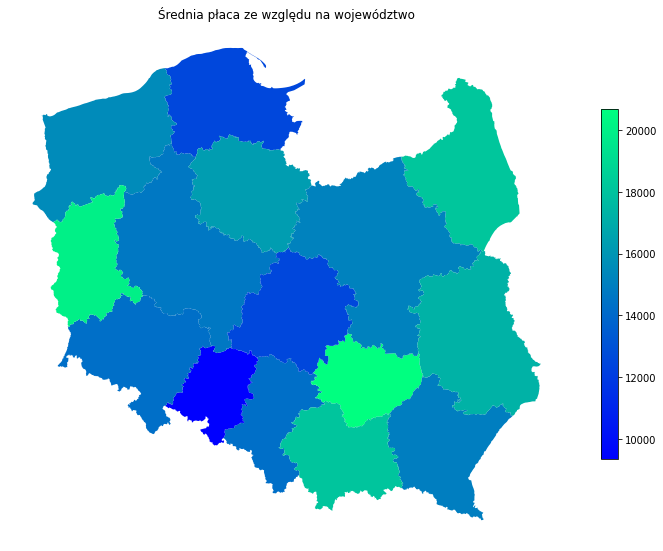

In [225]:
fig, ax = plt.subplots(figsize=(10, 10))
df_woj_mean_map.plot(column='srednie_zarobki', cmap='winter', linewidth=1.5, ax=ax)

vmin, vmax = df_woj_mean_map['srednie_zarobki'].min(), df_woj_mean_map['srednie_zarobki'].max()
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, shrink=0.5, ax=ax)

ax.grid(True)
ax.set_axis_off()
ax.set_title("Średnia płaca ze względu na województwo")
plt.tight_layout()
plt.show()